# Project Name - Health Care dataset analysis

# *Developed by: Devesh Sreekumar*

# Problem Statement|

**The goal of this analysis is to explore patterns in healthcare data, focusing on:**

1) Understanding the relationship between demographic factors (gender, age) and medical conditions, test results, and healthcare utilization.
2) Investigating how different insurance providers correlate with billing amounts and patient demographics.
3) Identifying trends in test outcomes and associated medications to improve patient care insights.

**By analyzing these factors, we aim to uncover key insights that can inform healthcare decision-making and resource allocation.**

# Objective

**1.Data Cleaning and Preprocessing:** Clean and preprocess the Health Care dataset to handle missing values and inconsistencies.

**2.Exploratory Data Analysis (EDA):** Conduct exploratory data analysis to understand the distribution, relationships, and patterns within the health metrics

**3.Data Visualization and Insight Generation:** Visualize the key relationships and trends in the dataset using plots, graphs, and charts.

**4.Actionable Recommendations:** Based on the analysis and model outcomes, provide actionable recommendations

# *Github Link*

### *https://github.com/Devesh1708/Sprint_2*

# Understanding Variable

**Patient_ID:** A unique identifier for each Patient in the dataset.

**age:** The age of the patient in years.

**Gender:** The gender of the patient (e.g., Male, Female, Other)

**Blood_Type:** The blood group of the patient (e.g., A, B, AB, O).

**Medical_Condition:** Details about the patient's diagnosed medical condition(s).

**Medication:** The prescribed medication(s) for the patient

**Test_Results:** Results of diagnostic tests conducted for the patient.

**Date_of_Admission:** The date when the patient was admitted to the healthcare facility.

**Discharge_Date:** The date when the patient was discharged from the healthcare facility.

**Admission_Type:** The category of admission (e.g., Emergency, Routine, Elective).

**Insurance_Provider:** The insurance company providing coverage for the patient.

**Billing_Amount:** The total amount billed for the patient's treatment and services.

## Importing Necessary Packages

In [1]:
!pip install mysql-connector-python

In [149]:
import mysql.connector # For connecting to MySQL database
import pandas as pd   # Data Manipulation
import matplotlib.pyplot as plt # Data Visualisation
import seaborn as sns # For enhanced visualizations based on Matplotlib

**Insight**   
Imported all necessary packages

## Connection to the MySQL Database

In [151]:
# Establishing Connection to the MySQL Database
db_connection = mysql.connector.connect(
    user='root',  # Replace with your database username
    password='maithili1206', # Replace with your database password
    host='localhost', # Host where the database server is running
    database='health_insurance_details'  # Name of the database to connect to
)

In [153]:
if db_connection.is_connected():
    print("Connected to MySQL database")

Connected to MySQL database


**Insight**   
A connection is established to the MySQL database using the mysql.connector.connect() method, providing credentials, host, and database name to access the health insurance database.

## SQL Query

In [155]:
# SQL Query to Fetch Data
# Using a NATURAL JOIN to combine Patient_details , Admission_details and  Billing_details based on their common fields.
Query= '''
select * 
from  Patient_Details
natural join Admission_Details
natural join Billing_details;
'''

**Insight**   
The SQL query uses NATURAL JOIN to combine data from the Patient Details, Admission Details and Billing details tables based on their common fields, fetching all columns into the analysis-ready dataset.

# *Loading the dataset to the Notebook*

In [157]:
# Reading Data from the Database into a Pandas DataFrame
# The data fetched using the query will be stored in the DataFrame 'df'.
df = pd.read_sql(Query, db_connection)

# Print the dataset
df

/var/folders/d3/tc4wph_x5qjcpvz2ldtxd2jm0000gn/T/ipykernel_16839/832298776.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(Query, db_connection)


,Patient_ID,Age,Gender,Blood_Type,Medical_Condition,Medication,Test_Results,Date_of_Admission,Discharge_Date,Admission_Type,Insurance_Provider,Billing_Amount
0,101,30,Male,B-,Cancer,Paracetamol,Normal,2024-01-31,2024-02-02,Urgent,Blue Cross,18856.30
1,102,62,Male,A+,Obesity,Ibuprofen,Inconclusive,2019-08-20,2019-08-26,Emergency,Medicare,33643.30
2,103,76,Female,A-,Obesity,Aspirin,Normal,2022-09-22,2022-10-07,Emergency,Aetna,27955.10
3,104,28,Female,O+,Diabetes,Ibuprofen,Abnormal,2020-11-18,2020-12-18,Elective,Medicare,37909.80
4,105,43,Female,AB+,Cancer,Penicillin,Abnormal,2022-09-19,2022-10-09,Urgent,Aetna,14238.30
5,106,36,Male,A+,Asthma,Ibuprofen,Normal,2023-12-20,2023-12-24,Urgent,UnitedHealthcare,48145.10
6,107,21,Female,AB-,Diabetes,Paracetamol,Inconclusive,2020-11-03,2020-11-15,Emergency,Medicare,19580.90
7,108,20,Female,A+,Cancer,Paracetamol,Inconclusive,2021-12-28,2022-01-07,Emergency,Cigna,45820.50
8,109,82,Male,AB+,Asthma,Aspirin,Abnormal,2020-07-01,2010-07-14,Elective,Cigna,50119.20
9,110,58,Female,AB-,Cancer,Paracetamol,Inconclusive,2021-05-23,2021-06-22,Elective,UnitedHealthcare,19784.60


**Insight**  
Loading the dataset to jupyter notebook

# *Dataset View*

In [89]:
# Displaying the First Few Rows of the DataFrame
# This is to verify that the data has been fetched and loaded correctly.
df.head()

,Patient_ID,Age,Gender,Blood_Type,Medical_Condition,Medication,Test_Results,Date_of_Admission,Discharge_Date,Admission_Type,Insurance_Provider,Billing_Amount
0,101,30,Male,B-,Cancer,Paracetamol,Normal,2024-01-31,2024-02-02,Urgent,Blue Cross,18856.3
1,102,62,Male,A+,Obesity,Ibuprofen,Inconclusive,2019-08-20,2019-08-26,Emergency,Medicare,33643.3
2,103,76,Female,A-,Obesity,Aspirin,Normal,2022-09-22,2022-10-07,Emergency,Aetna,27955.1
3,104,28,Female,O+,Diabetes,Ibuprofen,Abnormal,2020-11-18,2020-12-18,Elective,Medicare,37909.8
4,105,43,Female,AB+,Cancer,Penicillin,Abnormal,2022-09-19,2022-10-09,Urgent,Aetna,14238.3


**Insight**   
Here we print first five rows of the dataset.

In [92]:
# Display the last 5 rows of the DataFrame
# Purpose: Verifies the structure and content of the last few records in the dataset
df.tail()

,Patient_ID,Age,Gender,Blood_Type,Medical_Condition,Medication,Test_Results,Date_of_Admission,Discharge_Date,Admission_Type,Insurance_Provider,Billing_Amount
45,146,65,Male,O+,Cancer,Penicillin,Normal,2022-10-12,2022-11-02,Emergency,Medicare,45585.9
46,147,31,Female,O+,Hypertension,Paracetamol,Normal,2021-12-01,2021-12-09,Elective,Cigna,29615.4
47,148,58,Male,A-,Diabetes,Aspirin,Normal,2020-05-04,2020-05-13,Urgent,Cigna,36992.3
48,149,22,Male,O+,Hypertension,Ibuprofen,Abnormal,2023-09-19,2023-09-23,Urgent,UnitedHealthcare,28051.5
49,150,77,Female,O+,Asthma,Ibuprofen,Abnormal,2019-07-19,2019-07-29,Urgent,Cigna,16320.2


**Insight**    
Here we print last five rows of the dataset

In [13]:
# Check the shape of the dataset
# Output: (rows, columns)
df.shape

(50, 12)

**Insight**   
Here we print row and column size of the dataset

# *Dataset Description*

In [15]:
# Gives the overall info of the dataframe object
df.describe()

,Patient_ID,Age,Billing_Amount
count,50.00000,50.000000,50.000000
mean,125.50000,50.860000,27469.699200
std,14.57738,19.443282,13310.902988
min,101.00000,20.000000,4397.780000
25%,113.25000,34.000000,18203.600000
50%,125.50000,50.000000,25900.800000
75%,137.75000,67.750000,37680.425000
max,150.00000,82.000000,50119.200000


**Insight**   
The df.describe() method provides a statistical summary of the dataset. It shows key metrics such as count, mean, standard deviation, and range (min, max) for numerical columns.

# *Dataset Information*

In [17]:
# Gives the a concise summary of a DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          50 non-null     int64  
 1   Age                 50 non-null     int64  
 2   Gender              50 non-null     object 
 3   Blood_Type          50 non-null     object 
 4   Medical_Condition   50 non-null     object 
 5   Medication          50 non-null     object 
 6   Test_Results        50 non-null     object 
 7   Date_of_Admission   50 non-null     object 
 8   Discharge_Date      50 non-null     object 
 9   Admission_Type      50 non-null     object 
 10  Insurance_Provider  50 non-null     object 
 11  Billing_Amount      50 non-null     float64
dtypes: float64(1), int64(2), object(9)
memory usage: 4.8+ KB


**Insight**   
We use info() to get concise summary of our dataset i.e column, non null , count , memory usage and datatype.

# *Data Cleaning*

In [19]:
# It is used to identify and count missing values (NaNs) in a DataFrame
df.isnull().sum()

Patient_ID            0
Age                   0
Gender                0
Blood_Type            0
Medical_Condition     0
Medication            0
Test_Results          0
Date_of_Admission     0
Discharge_Date        0
Admission_Type        0
Insurance_Provider    0
Billing_Amount        0
dtype: int64

**Insight**   
We used isnull().sum() to identify missing values in the DataFrame. The output shows no missing values, so no data cleaning is required.

# *Duplicate Values*

In [23]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


**Insight**   
Here we can see there are 0 duplicates rows in our dataset. After checking for duplicate rows in the dataset, we ensure that each entry is unique.

# *Check Unique Values*

In [27]:
# Check for unique values in each column
for col in df.columns:
    unique_values = df[col].nunique()
    print(f"Column {col} has {unique_values} unique values.")

Column Patient_ID has 50 unique values.
Column Age has 37 unique values.
Column Gender has 2 unique values.
Column Blood_Type has 8 unique values.
Column Medical_Condition has 6 unique values.
Column Medication has 5 unique values.
Column Test_Results has 3 unique values.
Column Date_of_Admission has 49 unique values.
Column Discharge_Date has 49 unique values.
Column Admission_Type has 3 unique values.
Column Insurance_Provider has 7 unique values.
Column Billing_Amount has 50 unique values.


**Insight**   
Here we checked all unique values from our Dataset. Checking for unique values helps us understand the variability in categorical and numerical features.

# **Data Visualization**

# **Visualization 1**

,Gender,Count
0,Female,32
1,Male,18


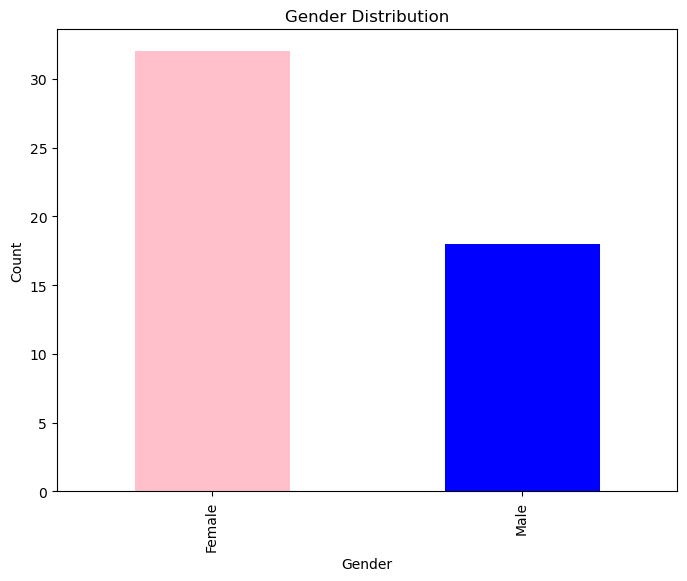

In [85]:
#Gender Distribution using bar chart
#Calculate the count of each gender in the dataset
gender_counts_df = df['Gender'].value_counts().reset_index()
gender_counts_df.columns = ['Gender', 'Count']
display(gender_counts_df)

# Plot the gender distribution
gender_counts_df.plot(kind='bar', x='Gender', y='Count', color=['pink', 'blue'], legend=False, figsize=(8, 6))
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

**Insight**   
The dataset contains a higher number of female patients compared to male patients.

# **Visualization 2**

,Blood_Type,Gender,Count
0,A+,Female,5
1,A+,Male,4
2,A-,Female,5
3,A-,Male,1
4,AB+,Female,7
5,AB+,Male,3
6,AB-,Female,4
7,AB-,Male,3
8,B+,Female,1
9,B+,Male,2


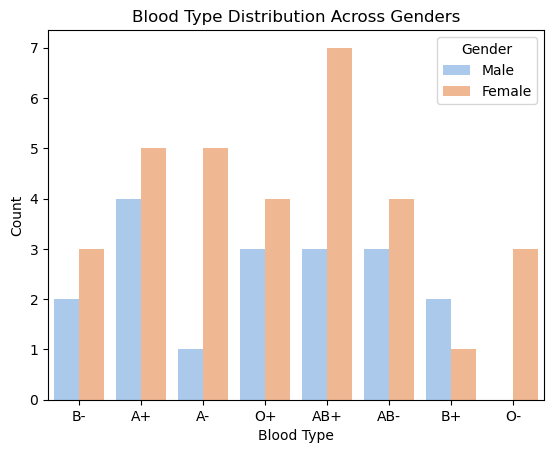

In [97]:
# Use seaborn to create a grouped bar chart showing blood type distribution by gender
# Calculate exact counts for unique blood groups across genders
blood_type_counts = df.groupby(['Blood_Type', 'Gender']).size().reset_index(name='Count')
display(blood_type_counts)  # Display as a DataFrame

# Visualization: Grouped bar chart showing blood type distribution by gender
sns.countplot(data=df, x='Blood_Type', hue='Gender', palette='pastel')
plt.title("Blood Type Distribution Across Genders")
plt.xlabel("Blood Type")
plt.ylabel("Count")
plt.show()

**Insight**   
Blood type A+ is the most common among both genders.
Gender balance is nearly equal for blood types O+ and AB-, suggesting no significant gender difference.

# **Visualization 3**

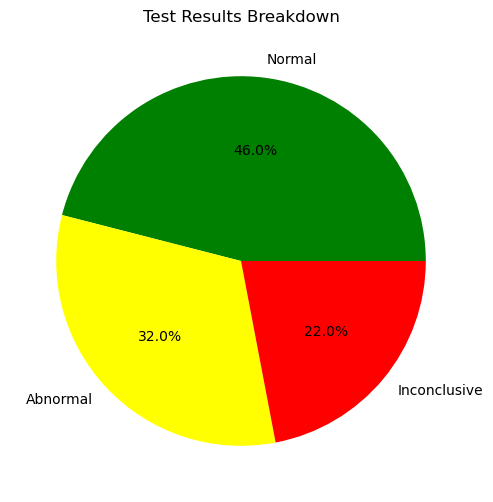

,Test_Results,Medication
0,Abnormal,"Ibuprofen, Penicillin, Aspirin, Paracetamol, L..."
1,Inconclusive,"Ibuprofen, Paracetamol, Lipitor, Aspirin"
2,Normal,"Paracetamol, Aspirin, Ibuprofen, Lipitor, Peni..."


In [119]:
# Test Results Breakdown (Normal vs. Abnormal)
# Count the number of occurrences for each test result category
test_results_counts = df['Test_Results'].value_counts()

# Plot a pie chart showing the distribution of test results
test_results_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 6), colors=['green', 'yellow', 'red'])
plt.title("Test Results Breakdown")
plt.ylabel("")  # Remove y-axis label for better appearance
plt.show()

# Grouping by Test Results and displaying associated Medications
medications_by_result = df.groupby('Test_Results')['Medication'].apply(lambda x: ', '.join(x.unique())).reset_index()

# Display medications by test result
display(medications_by_result)



**Insight**   
46% of patients have normal test results, 32% have abnormal results, and 22% are inconclusive, with common medications like Paracetamol, Ibuprofen, and Aspirin being prescribed across all categories.

# **Visualization 4**

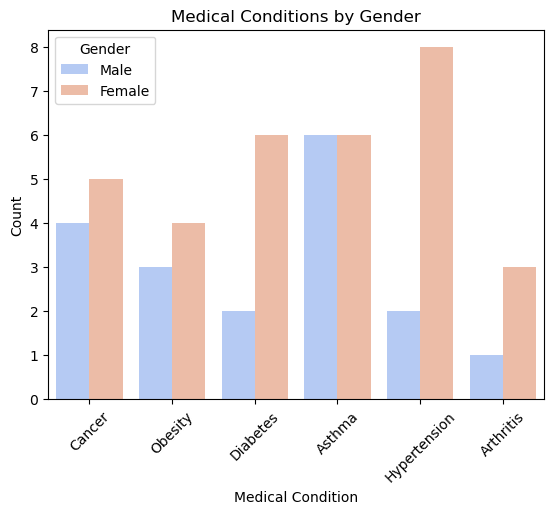

In [125]:
# Use seaborn to create a grouped bar chart for medical conditions by gender
sns.countplot(data=df, x='Medical_Condition', hue='Gender', palette='coolwarm')
plt.title("Medical Conditions by Gender")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.xlabel("Medical Condition")
plt.ylabel("Count")
plt.show()


**Insight**   
The grouped bar chart shows that females have a higher count of medical conditions, particularly Hypertension and Asthma, while Arthritis has the lowest count for both genders. Hypertension is more prevalent in females, while Asthma is equally common in both males and females.

# **Visualization 5**

/var/folders/d3/tc4wph_x5qjcpvz2ldtxd2jm0000gn/T/ipykernel_16839/2283190000.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(values='Patient_ID', index='Age_Group', columns='Admission_Type', aggfunc='count')


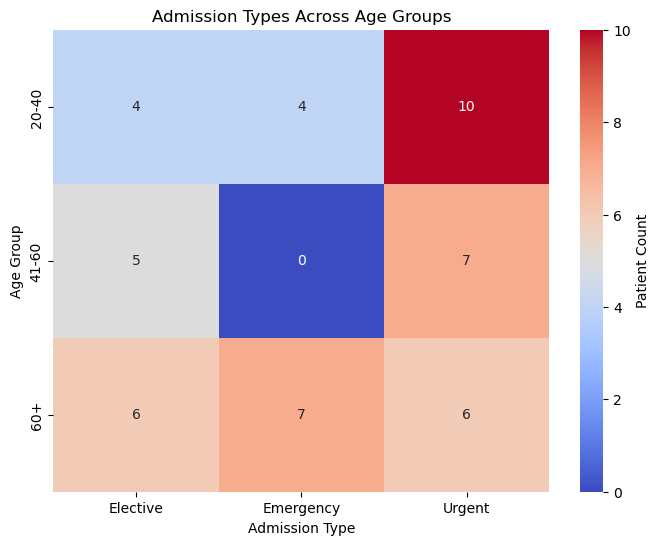

In [134]:
# Create age groups based on the 'Age' column
df['Age_Group'] = pd.cut(df['Age'], bins=[20, 40, 60, 100], labels=['20-40', '41-60', '60+'])

# Create a pivot table for the heatmap: count of Patient_ID by Age_Group and Admission_Type
pivot_table = df.pivot_table(values='Patient_ID', index='Age_Group', columns='Admission_Type', aggfunc='count')

# Create the heatmap showing admission types across different age groups
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='d', cbar_kws={'label': 'Patient Count'})
plt.title("Admission Types Across Age Groups")
plt.xlabel("Admission Type")
plt.ylabel("Age Group")
plt.show()


**Insight**  
Emergency admissions dominate in the 60+ age group, reflecting higher health risks with age.

# **Visualization 6**

/var/folders/d3/tc4wph_x5qjcpvz2ldtxd2jm0000gn/T/ipykernel_16839/2866085650.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Insurance_Provider', y='Billing_Amount', palette='coolwarm',ci=None)
/var/folders/d3/tc4wph_x5qjcpvz2ldtxd2jm0000gn/T/ipykernel_16839/2866085650.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Insurance_Provider', y='Billing_Amount', palette='coolwarm',ci=None)


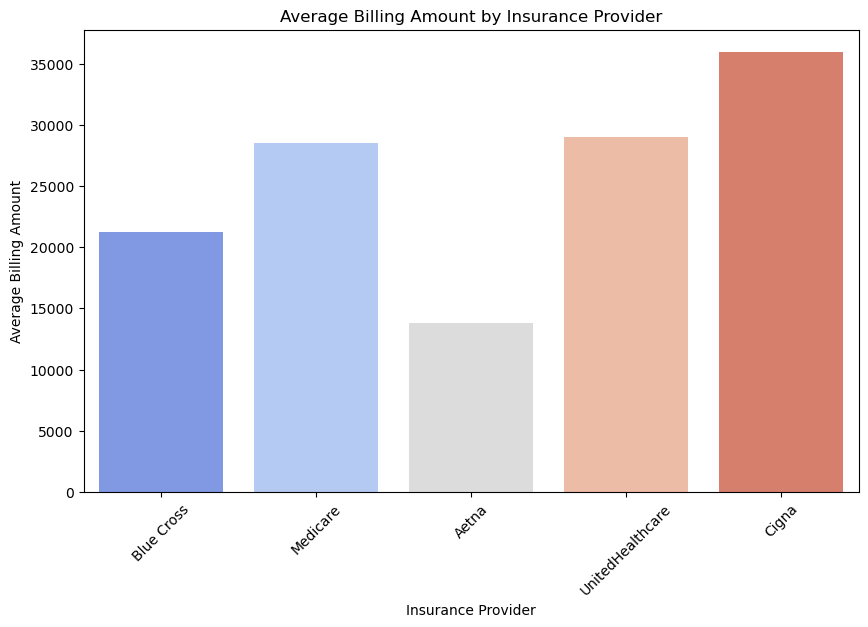

,Insurance_Provider,Count,Average Billing Amount
0,Aetna,8,13835.327500
1,Blue Cross,6,21278.791667
2,Cigna,14,35981.378571
3,Medicare,13,28503.499231
4,UnitedHealthcare,9,28982.755556


In [187]:
# Create a barplot to show average billing amounts for each insurance provider
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Insurance_Provider', y='Billing_Amount', palette='coolwarm',ci=None)
plt.title("Average Billing Amount by Insurance Provider")
plt.xlabel("Insurance Provider")
plt.ylabel("Average Billing Amount")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

insurance_summary = df.groupby('Insurance_Provider')['Billing_Amount'].agg(['count', 'mean']).reset_index()
insurance_summary.rename(columns={'count': 'Count', 'mean': 'Average Billing Amount'}, inplace=True)
display(insurance_summary)



**Insight**  
Cigna has the highest average billing amount of 35,981.38 with 14 records, while Aetna has the lowest average billing amount of 13,835.33, with 8 records.

# Conclusion

**Billing Analysis:** Cigna has the highest average billing amount, while Aetna has the lowest.

**Gender Insights:** Females exhibit higher counts in most medical conditions, particularly hypertension and asthma.

**Test Results:** A majority of test results are normal, with medications varying across test result categories.

**Insurance Provider Trends:** Insurance providers show significant differences in billing amounts, with Medicare and UnitedHealthcare showing moderate averages.

**Medical Condition Distribution:** Gender-based differences in medical conditions, such as a higher prevalence of hypertension in females.

**Age Group and Admission Patterns:** Age group distribution affects admission types, with specific trends in patient counts across age groups.

# Recommendations

**Targeted Healthcare Plans:** Insurance providers like Cigna with higher billing amounts may need to consider revising their policies to offer more affordable options, particularly for high-cost patients.

**Gender-Specific Health Campaigns:** Given the higher prevalence of hypertension and asthma among females, targeted awareness campaigns and preventive measures for these conditions could be beneficial.

**Improve Inconclusive Test Handling:** As a significant percentage of tests are inconclusive, enhancing diagnostic tools or follow-up procedures could help in improving test result accuracy and treatment plans.

**Age-Appropriate Admission Plans:** Hospitals could consider tailoring admission types based on age groups, especially for older patients, to better manage healthcare costs and resources.

**Blood Type Data Utilization:** Analyzing blood type distributions may help customize treatments or interventions based on gender-specific blood type patterns.